In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

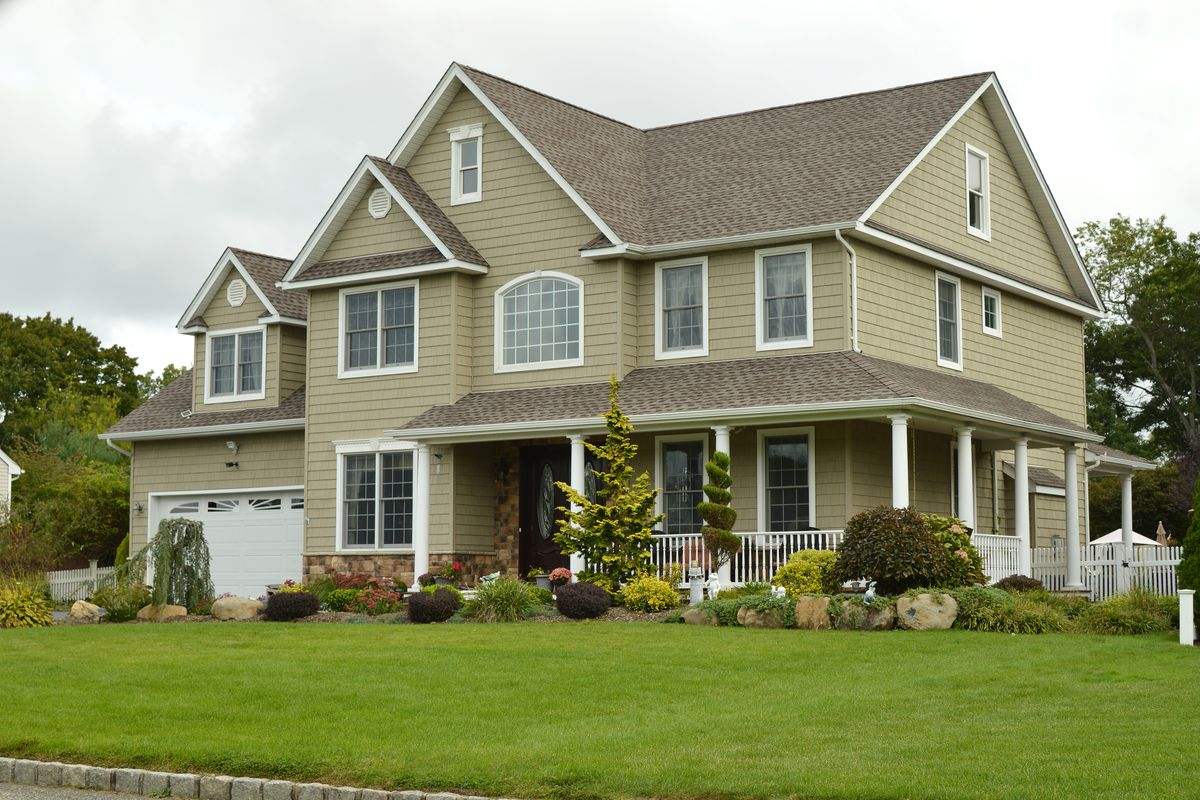

In [153]:
input = cv2.imread('./mill_house.jpg')
cv2_imshow(input)

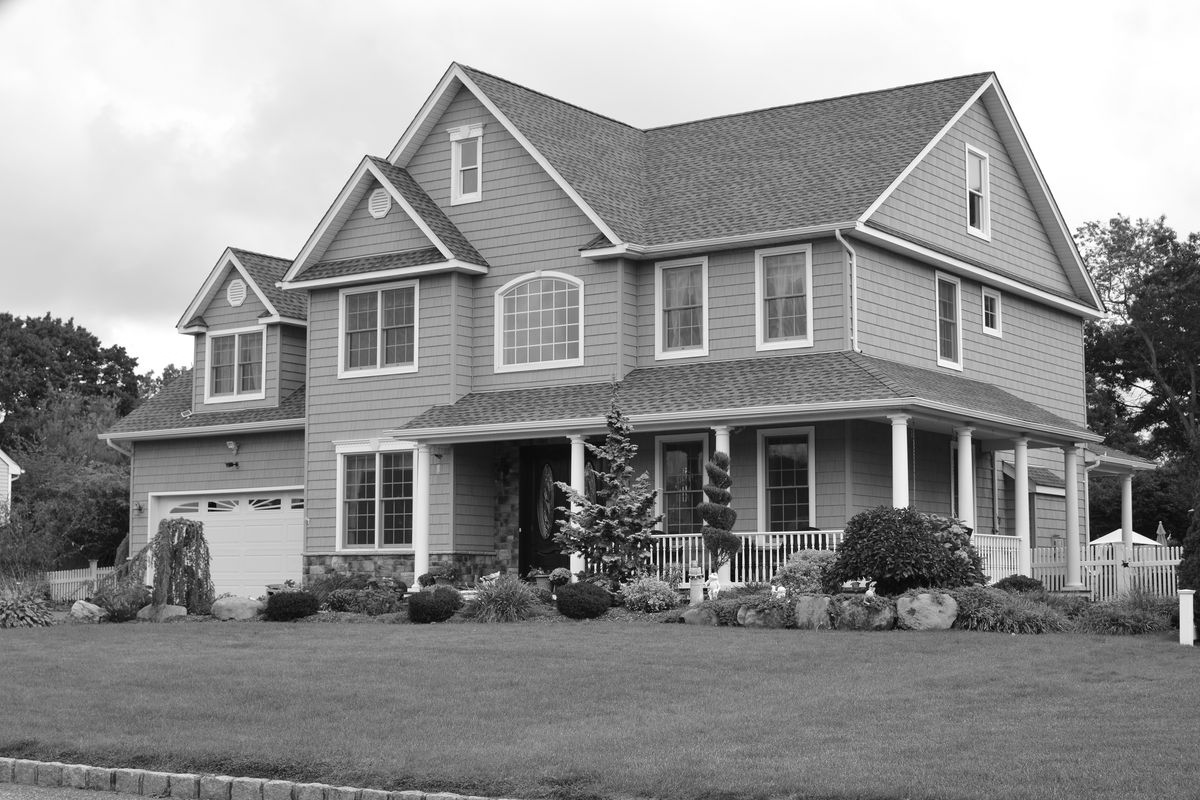

In [154]:
gray_image = cv2.cvtColor(input , cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

(256,)


Text(0.5, 1.0, 'Grayscale Image')

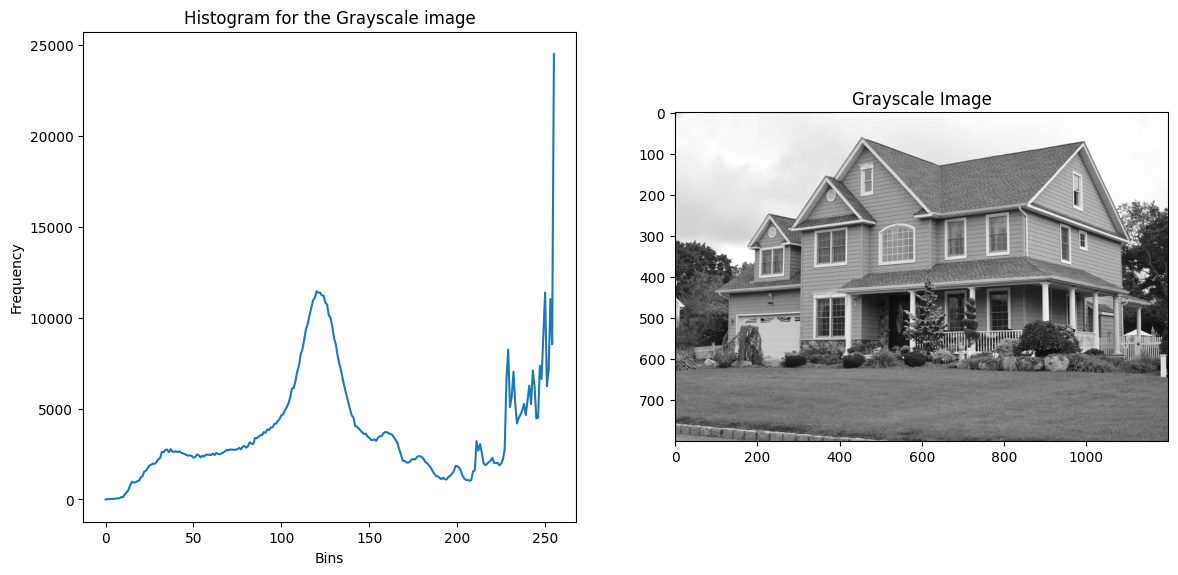

In [195]:
gray_hist = cv2.calcHist([gray_image] ,[0] ,None , [256] , [0 , 256] )
fig = plt.figure(figsize=(14,14))

print(gray_hist.flatten().shape)
ax1 = fig.add_subplot(2 , 2 , 1)
ax1.plot(gray_hist)
ax1.set_xlabel('Bins')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram for the Grayscale image')


ax2 = fig.add_subplot(2, 2 , 2)
ax2.imshow(gray_image , cmap = 'gray')
ax2.set_title('Grayscale Image')

In [196]:
deno = sum(gray_hist)[0]

In [197]:
for i in range(len(gray_hist)):
  gray_hist[i,:1] = 1.0 * gray_hist[i,:1] / deno

In [198]:
gray_hist = gray_hist[:,0]

In [199]:
# Obtaining threshold by maximizing the between class variance
sigma_max = -9999
threshold = -1

# Obtaining threshold by maximizing the ratio of between class variance and total variance
# 2nd method given in the paper

theta = -9999
theta_thresh = -1

for k in range(1 , 255):

  w0 = np.sum(gray_hist[:k])
  w1 = np.sum(gray_hist[k:])

  u0 = np.sum(np.array( [i for i in range(k)] ) * gray_hist[:k] ) / w0
  u1 = np.sum(np.array( [i for i in range(k , 256)] ) * gray_hist[k:] ) / w1
  uT = w0 * u0 + w1 * u1

  sigma0 = np.sum(np.array( [ np.power(i - u0 , 2)  for i in range(k)] ) * gray_hist[:k] ) / w0
  sigma1 = np.sum(np.array( [ np.power(i - u1 , 2)  for i in range(k , 256)] ) * gray_hist[k:] ) / w1

  sigmaW = w0 * sigma0 + w1 * sigma1
  sigmaB = w0 * w1 * np.power(u1 - u0 , 2)

  sigmaT = np.sum(np.array([ np.power(i - uT , 2) for i in range(256) ]) * gray_hist )

  if theta < sigmaB / sigmaT:
    theta = sigmaB / sigmaT
    theta_thresh = k

  if sigma_max < sigmaB:
    sigma_max = sigmaB
    threshold = k

In [200]:
print(f"Threshold by maximizing the between class variance : {threshold}")
print(f"Threshold by maximizing the ratio of between class variance and total variance : {theta_thresh}")
print(f"Between class variance : {sigma_max}")

Threshold by maximizing the between class variance : 166
Threshold by maximizing the ratio of between class variance and total variance : 166
Between class variance : 3229.1470728797276


Text(0.5, 1.0, 'Image after applying threshold ')

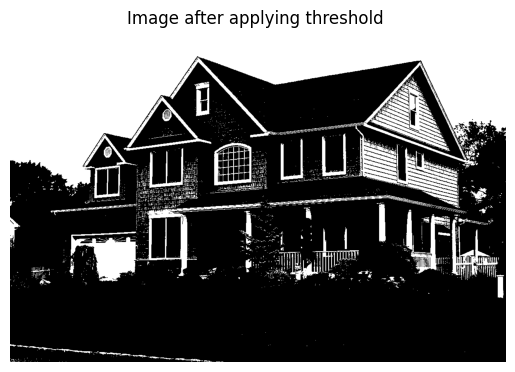

In [201]:
plt.imshow(gray_image > threshold , cmap = 'gray')
plt.axis('off')
plt.title('Image after applying threshold ')

Text(0.5, 1.0, 'Image after using threshold_otsu method from skimage')

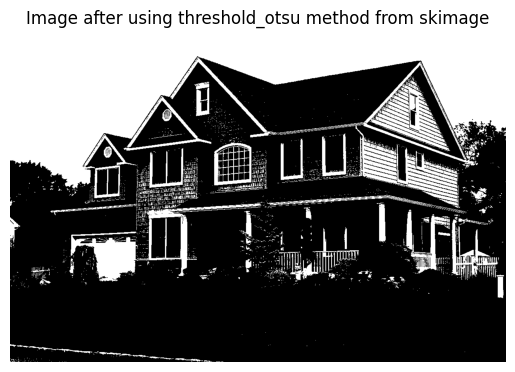

In [202]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh
plt.imshow(binary , cmap = 'gray')
plt.axis('off')
plt.title('Image after using threshold_otsu method from skimage')